In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve

##ANN STUFF
from sklearn.neural_network import MLPClassifier        # The ANN model
from sklearn.preprocessing import StandardScaler        # To normalize features
from sklearn.metrics import accuracy_score              # To evaluate performance

import matplotlib.pyplot as plt


## Data piped from CSV

In [123]:
DATA_PATH = '../data/'
file_name = 'heart_og.csv'


heart_og_df = pd.read_csv(DATA_PATH+file_name)

# Displays the first 5 rows
heart_og_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Stuff (Pretty Pictures)

## Pre-processing

In [124]:
y = heart_og_df["target"]
X = heart_og_df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)
#first xtrain rows
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3
405,56,1,2,130,256,1,0,142,1,0.6,1,1,1
726,48,1,0,124,274,0,0,166,0,0.5,1,0,3
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2


In [125]:
##Scaling
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## ANN CLASSIFIER

## Training Model

In [126]:
#training
ANN_model = MLPClassifier(hidden_layer_sizes=(64, 32),
                      activation='relu',
                      solver='adam',
                      alpha = 0.001,
                      max_iter=100,
                      random_state=42)

ANN_model.fit(X_train_scaled, y_train)


c:\Users\mmrde\OneDrive\Documents\ECS 171\Class Proj\ML-Project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(64, 32), max_iter=100,
              random_state=42)

## Testing Model

In [127]:
#Testing
y_pred = ANN_model.predict(X_test_scaled)


ANN_acc = accuracy_score(y_test, y_pred)

# Evaluate accuracy
cm        = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)


###MCC Matthews Correlation Coefficent(MCC)
y_score = ANN_model.predict_proba(X_test_scaled)[:,1]
mcc = matthews_corrcoef(y_test, y_pred)
##AUC
auc = roc_auc_score(y_test, y_score)


print(f"AUC: {auc}")
print(f"Mcc: {mcc : .8f}")
print(f"Accuracy: {ANN_acc*100 :5f}%")
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"Specificity: {specificity:.8f}")

AUC: 0.990625
Mcc:  0.93496622
Accuracy: 96.753247%
Precision: 0.96621622
Recall: 0.96621622
Specificity: 0.96875000


## Storing model

In [128]:
##Stored the trainedANN.joblib, so i deleted the second argument, no longer needed to store ANN models.

#joblib.dump((ANN_model, scalar), "./trainedModels/trainedANN.joblib")

## Charts

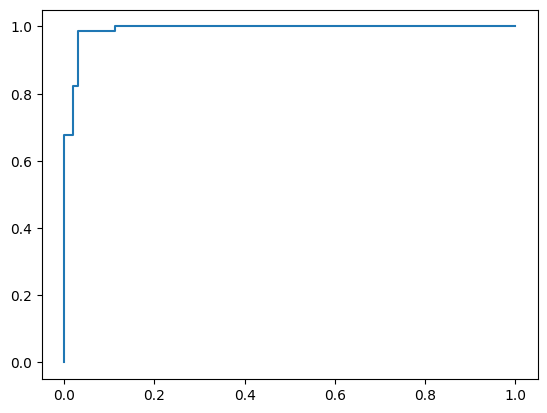

In [129]:
fpr,tpr, threshold = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
